# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", ticks=True, grid=False)

In [2]:
data = pd.read_csv("/home/mattia/Desktop/Ironhack/MODULE-3/WEEK-8/Paysim_log.csv")
data = data.sample(n=100000, axis=0)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5364403,375,CASH_OUT,223885.97,C947086661,224947.77,1061.79,C1834878567,253907.28,477793.26,0,0
2866064,227,CASH_OUT,435389.09,C1671084009,4561.80,0.00,C2078046010,989603.09,1424992.18,0,0
833488,41,CASH_IN,125886.35,C1964125022,28021406.63,28147292.98,C938675111,583287.81,457401.46,0,0
6101717,524,CASH_OUT,213050.99,C1420257700,5553.00,0.00,C1007703846,0.00,213050.99,0,0
5635277,396,PAYMENT,3980.27,C43043520,42495.00,38514.73,M472632178,0.00,0.00,0,0


In [3]:
data.shape

(100000, 11)

In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
#check number of unique entries for type of transaction
data["type"].value_counts()

CASH_OUT    35213
PAYMENT     33814
CASH_IN     21841
TRANSFER     8487
DEBIT         645
Name: type, dtype: int64

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.693140,1.793482e+05,8.296462e+05,8.504271e+05,1.095681e+06,1.220233e+06,0.001140,0.0
std,141.882501,5.678913e+05,2.885250e+06,2.921021e+06,3.165612e+06,3.440483e+06,0.033745,0.0
min,1.000000,8.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.338312e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,240.000000,7.559514e+04,1.404150e+04,0.000000e+00,1.344735e+05,2.134635e+05,0.000000,0.0
75%,335.000000,2.100297e+05,1.076995e+05,1.452365e+05,9.452275e+05,1.114362e+06,0.000000,0.0
max,743.000000,3.405129e+07,3.636535e+07,3.667630e+07,2.313304e+08,2.320366e+08,1.000000,0.0


In [8]:
data["isFlaggedFraud"].value_counts()

0    100000
Name: isFlaggedFraud, dtype: int64

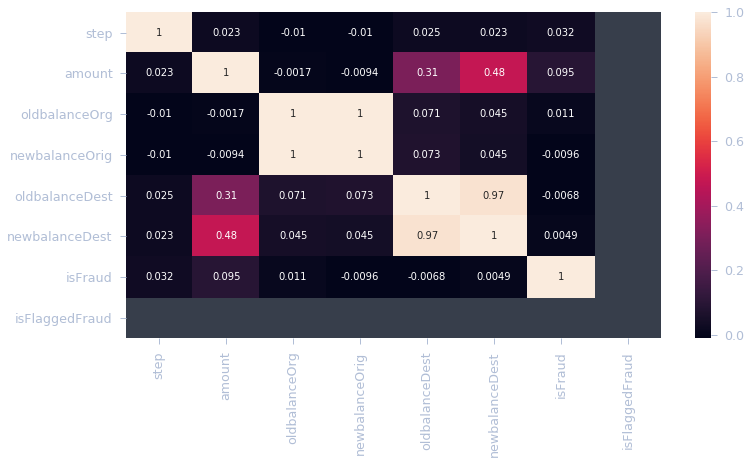

In [9]:
#correlation and heatmap use pearson cause no ordinal variables
corr = data.corr(method="pearson")
fig = plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [10]:
"""
The most important features to predict the outcome (=isFraud) should be (type) of transaction,
but also (amount) and (oldbalanceOrig) OR (newbalanceOrig) as well as one of the 2 between 
(oldbalanceDest) and (newbalanceDest). Regarding these last four, given the high correlation 
displayed with one another, 2 of them can be dropped.
"""

'\nThe most important features to predict the outcome (=isFraud) should be (type) of transaction,\nbut also (amount) and (oldbalanceOrig) OR (newbalanceOrig) as well as one of the 2 between \n(oldbalanceDest) and (newbalanceDest). Regarding these last four, given the high correlation \ndisplayed with one another, 2 of them can be dropped.\n'

### What is the distribution of the outcome? 

In [11]:
# Your response here
data["isFraud"].value_counts() / data.shape[0] * 100

# Outcome is binary - Bernoulli/binomial distribution
# Observations are not evenly distributed among the two possible values
# 99.87 of the results are concentrated on outcome 0

0    99.886
1     0.114
Name: isFraud, dtype: float64

In [12]:
# Test for Binomial distribution
p = (data["isFraud"].value_counts() / data.shape[0])[1]#probability of Fraud (isFraud = 1)
n = 10 #size of sample for test of distribution
val = np.array([0,1]) #number of possible outcomes of the variable isFraud
obs = np.array([i for i in data["isFraud"].value_counts()]) #observed frequency of the outcomes
# of variable isFraud
prob_tot  = st.binom.pmf(val,n,p)#Binomial prob distribution based on shape parameters observed
exp = prob_tot * np.sum(obs) #Expected frequency of the ouctomes of variable isFraud

print(st.chisquare(f_obs=obs, f_exp=exp)) # print result of chisquare test




Power_divergenceResult(statistic=922.4012787530613, pvalue=1.3247008678719658e-202)


In [13]:
"""
Given a sample of 10 observations, we actually reject the Null HP for which the outcome 
(isFraud) follows a binomial distribution
"""

'\nGiven a sample of 10 observations, we actually reject the Null HP for which the outcome \n(isFraud) follows a binomial distribution\n'

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [14]:
""" step is ok, represents numeber of hours between transactions in numeric format, like timestamp"""

' step is ok, represents numeber of hours between transactions in numeric format, like timestamp'

In [15]:
# Your code here
data.drop(["nameOrig", "nameDest"], axis=1, inplace=True)#Drop encoded names, not relevant
data["deltabalanceOrg"] = data["newbalanceOrig"] - data["oldbalanceOrg"] #aggregate columns to
#avoid correlation for balanceOrg
data["deltabalanceDest"] = data["newbalanceDest"] - data["oldbalanceDest"] #aggregate columns to
#avoid correlation for balanceDest
data.drop(["oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"], axis=1, inplace=True)
#drop balance columns once aggregated

In [16]:
# Transform type to dummy variables
type_encoded = pd.get_dummies(data["type"])
data = pd.concat([data,type_encoded], axis=1)
data.drop("type", axis=1, inplace=True)

In [17]:
data.sort_index(inplace=True)
data.head()
#need to reset index

,step,amount,isFraud,isFlaggedFraud,deltabalanceOrg,deltabalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
20,1,1373.43,0,0,-1373.43,0.00,0,0,0,1,0
90,1,358831.92,0,0,0.00,2945718.56,0,0,0,0,1
238,1,5946.79,0,0,-5946.79,0.00,0,0,0,1,0
526,1,95636.49,0,0,0.00,1004226.81,0,1,0,0,0
545,1,3943.17,0,0,-3943.18,0.00,0,0,0,1,0


In [18]:
data.dtypes

step                  int64
amount              float64
isFraud               int64
isFlaggedFraud        int64
deltabalanceOrg     float64
deltabalanceDest    float64
CASH_IN               uint8
CASH_OUT              uint8
DEBIT                 uint8
PAYMENT               uint8
TRANSFER              uint8
dtype: object

In [19]:
data.isna().sum()

step                0
amount              0
isFraud             0
isFlaggedFraud      0
deltabalanceOrg     0
deltabalanceDest    0
CASH_IN             0
CASH_OUT            0
DEBIT               0
PAYMENT             0
TRANSFER            0
dtype: int64

### Run a logisitc regression classifier and evaluate its accuracy.

In [26]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X= data.drop(["isFraud","isFlaggedFraud"],axis=1)
y= data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 29)
model_log = LogisticRegression().fit(X_train,y_train)
model_log.score(X_test,y_test)

0.9977

### Now pick a model of your choice and evaluate its accuracy.

In [27]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(X_train, y_train)
model_knn.score(X_test, y_test)

0.999

### Which model worked better and how do you know?

In [31]:
# Your response here
from sklearn.model_selection import cross_val_score

cv_results_log = cross_val_score(model_log, X, y, cv=5)
print(cv_results_log, "\n", np.mean(cv_results_log))

[0.9517  0.9991  0.99905 0.999   0.99885] 
 0.9895400000000001


In [32]:
cv_results_knn = cross_val_score(model_knn, X, y, cv=5)
print(cv_results_knn, "\n", np.mean(cv_results_knn))

[0.9984  0.99955 0.99925 0.99925 0.99945] 
 0.99918


In [ ]:
"""
Average score of knn after Cross Validation is higher than average score of log, so knn works
better. However:
# All accuracy scores are high because of the inbalance in the data. 99.87% of the observations
# concern non-fraudulent exchanges. Given this data, a model that always predicts "no fraud" will
# still have an accuracy above 99%. To properly train the model and have a better representation
# of its accuracy in predicting frauds, I would need more observations of fraudulent exchanges,
# in equal proportion to the non-fraudulent ones.

# Other solutions:
# - Change the performance metric to precision, recall or F1. Also study the confusion matrix
# - Change the algorithm to a Decision Tree, which is more tolerant of inbalanced data
# - Oversample the minority data: create copies of the cases of fraud until they are proportional to non-frauds
# - Undersample the majority data: analyse only a subset of the non-fraud cases
# - Generate synthetic samples of fraud (for example with imblearn's SMOTE)
"""

Confusion matrix, without normalization
[[19947    27]
 [   19     7]]
Normalized confusion matrix
[[0.99864824 0.00135176]
 [0.73076923 0.26923077]]


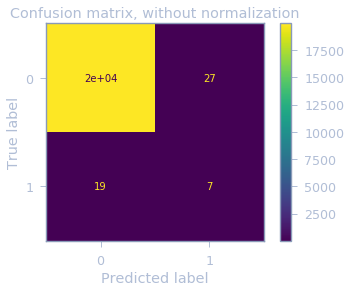

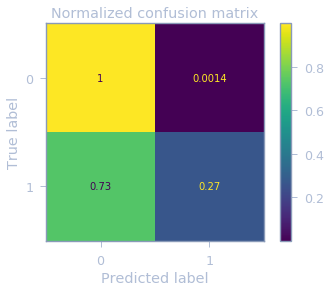

In [35]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_log, X_test, y_test, normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[19971     3]
 [   17     9]]
Normalized confusion matrix
[[9.99849805e-01 1.50195254e-04]
 [6.53846154e-01 3.46153846e-01]]


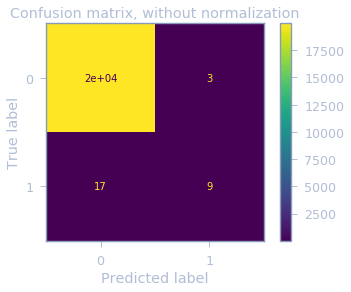

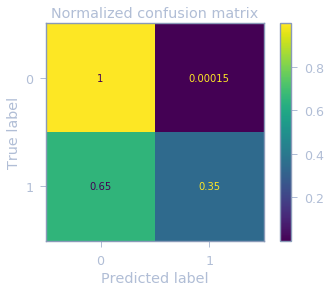

In [36]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_knn, X_test, y_test, normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.